In [1]:
from sklearn import preprocessing
from scipy import signal

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import pandas as pd
import scipy
import os, sys
import math
import scaleogram as scg
import pywt



In [2]:
data_dir = "./ml_data_v2/csv"
data = []

for f in os.listdir(data_dir):
    if f[0] is not '.':
        df = pd.read_csv(os.path.join(data_dir, f), index_col=0)
        data.append(df)


## Choose the first file for now

In [4]:
df = data[0]
df.head()

time     dt  Angle  grav1  grav2  grav3  gyro1  gyro2  gyro3  magnet1  \
0   29004   8912      2  -9.77   0.20  -0.70   4.06  -4.69 -44.81    30.25   
1   45812  16804      2  -9.78   0.00  -0.67   8.25  -5.13 -41.13    30.25   
2   65468  19652      2  -9.78  -0.14  -0.65   8.00  -6.19 -41.63    31.69   
3   85264  19792      2  -9.78  -0.29  -0.63   6.88  -8.50 -46.94    31.69   
4  102148  16876      2  -9.77  -0.44  -0.59  10.06 -11.19 -41.19    32.56   

   ...  accl1  accl2  accl3  linaccl1  linaccl2  linaccl3  quat1  quat2  \
0  ...  -9.58   0.56  -0.96      0.19      0.43     -0.27  -0.54  -0.44   
1  ...  -9.92   0.20  -1.23     -0.14      0.28     -0.56  -0.54  -0.45   
2  ...  -9.62   0.12  -0.94      0.16      0.34     -0.30  -0.55  -0.45   
3  ...  -9.22   1.08  -0.67      0.55      1.45     -0.05  -0.55  -0.45   
4  ...  -9.45   1.75  -0.30      0.31      2.19      0.28  -0.55  -0.46   

   quat3  quat4  
0   0.58  -0.42  
1   0.58  -0.41  
2   0.57  -0.41  
3   0.57  -0.41  
4   0.57  -0.40  

[5 rows x 25 columns]

In [5]:
# sampling freqency
f = 1 / (df['dt'].mean() * 1e-6)
ns = df['time'].size
time = df['time']*1e-6

# Plotting

Text(0.5, 1.0, 'Rotation')

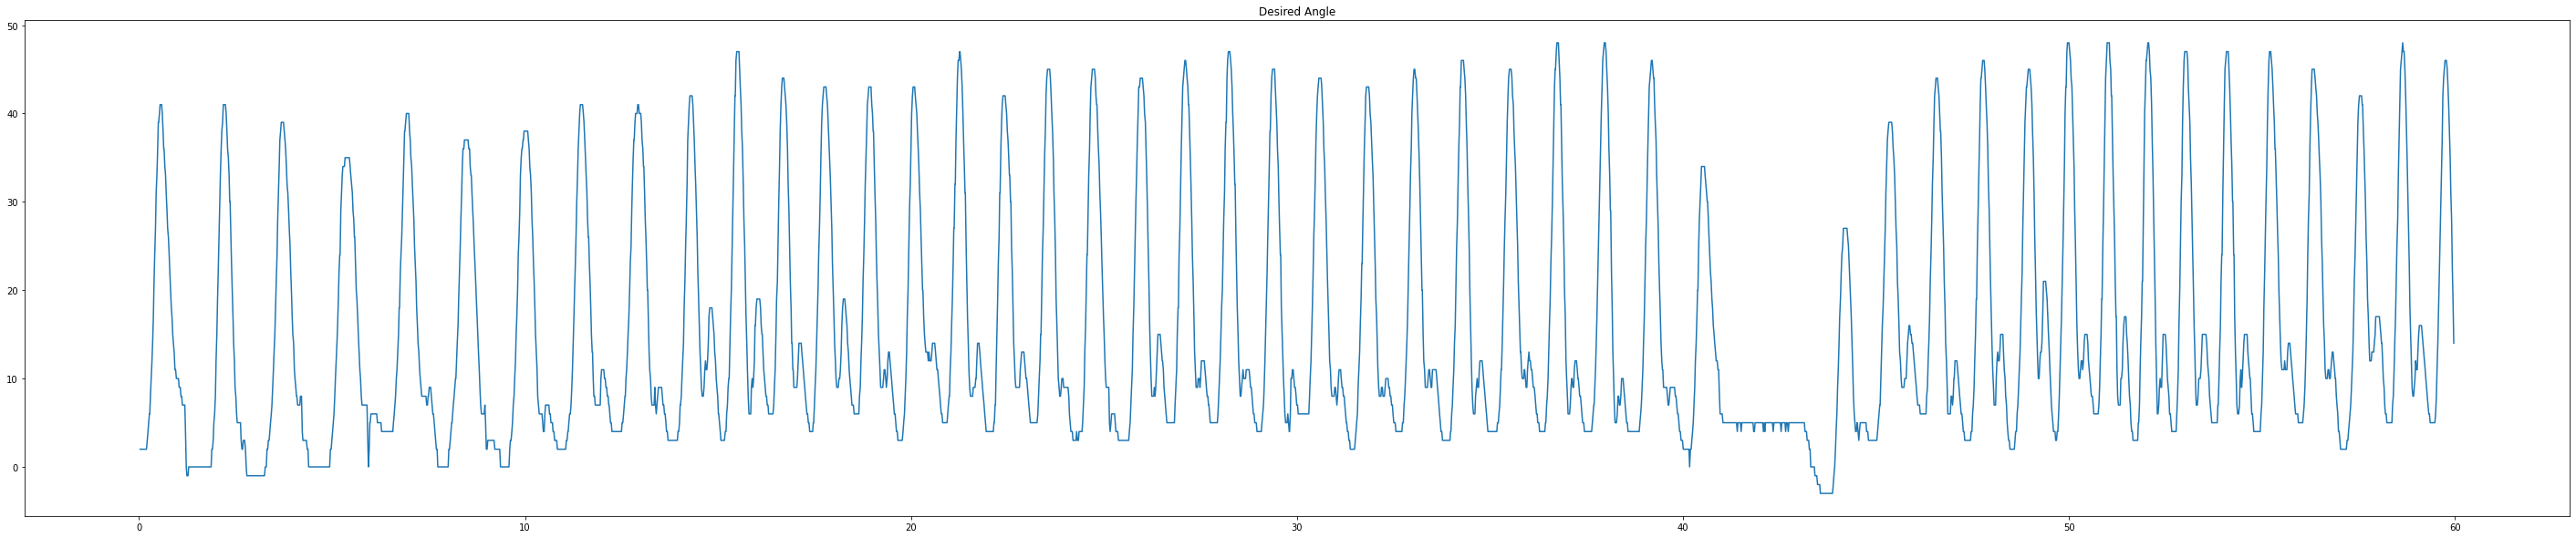

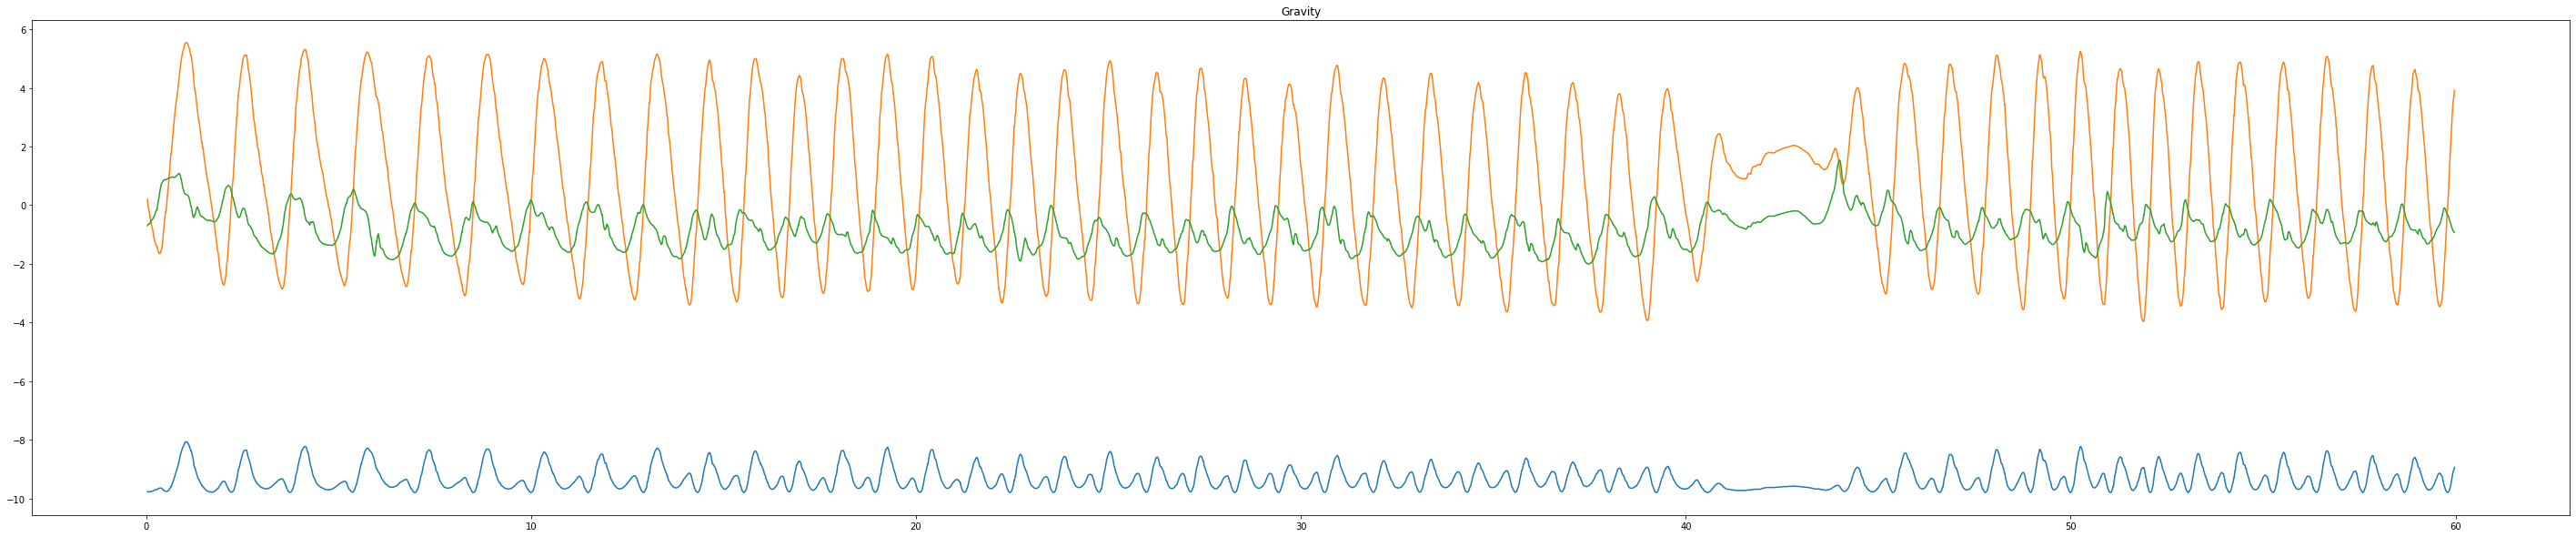

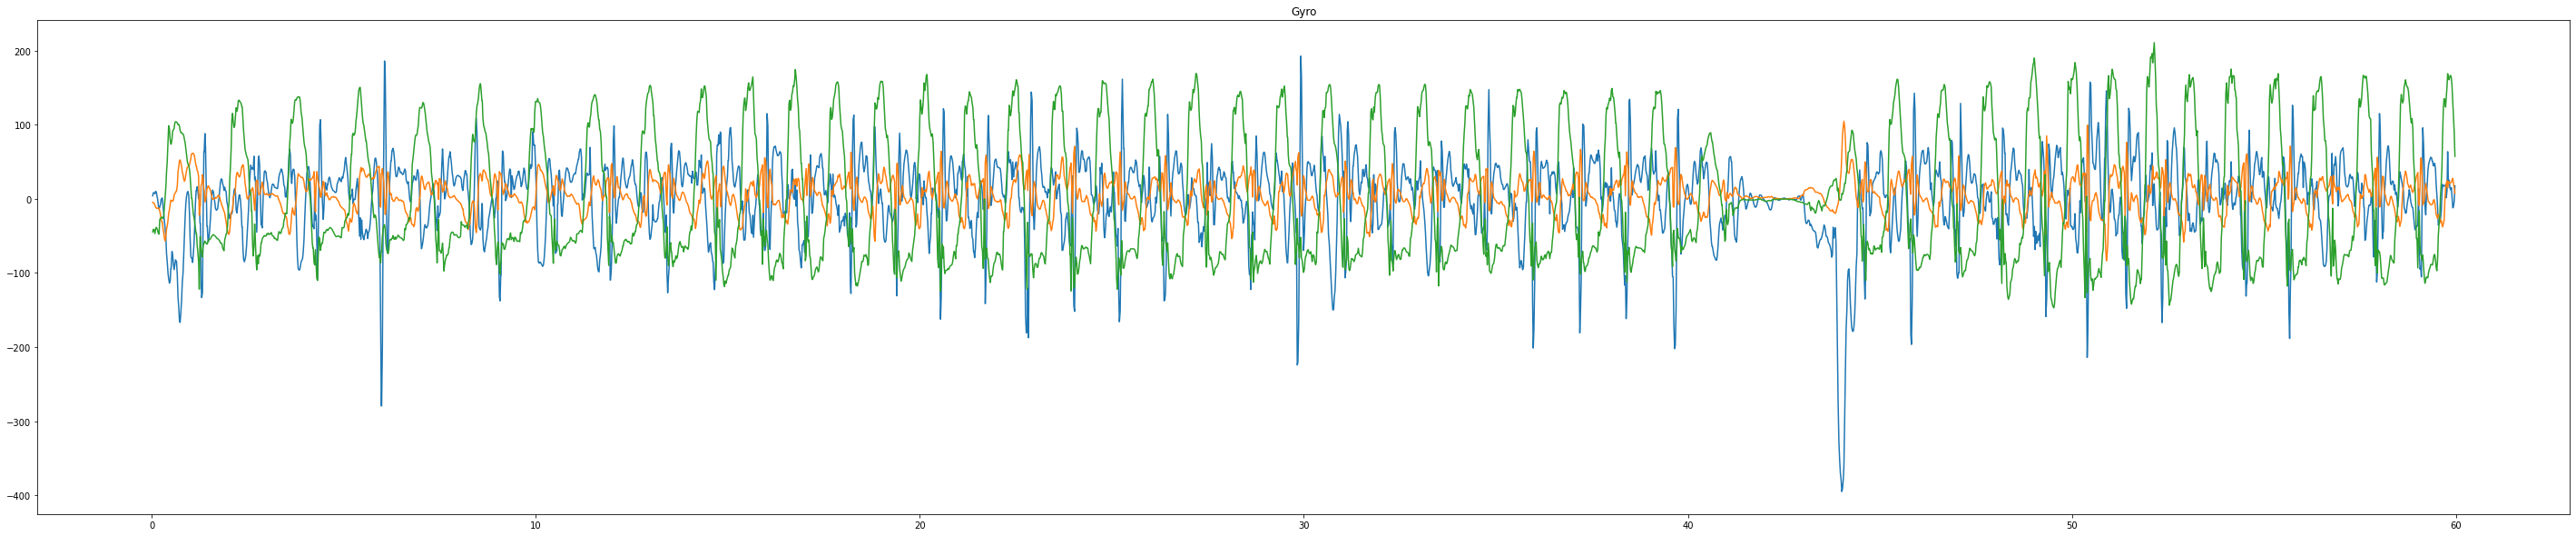

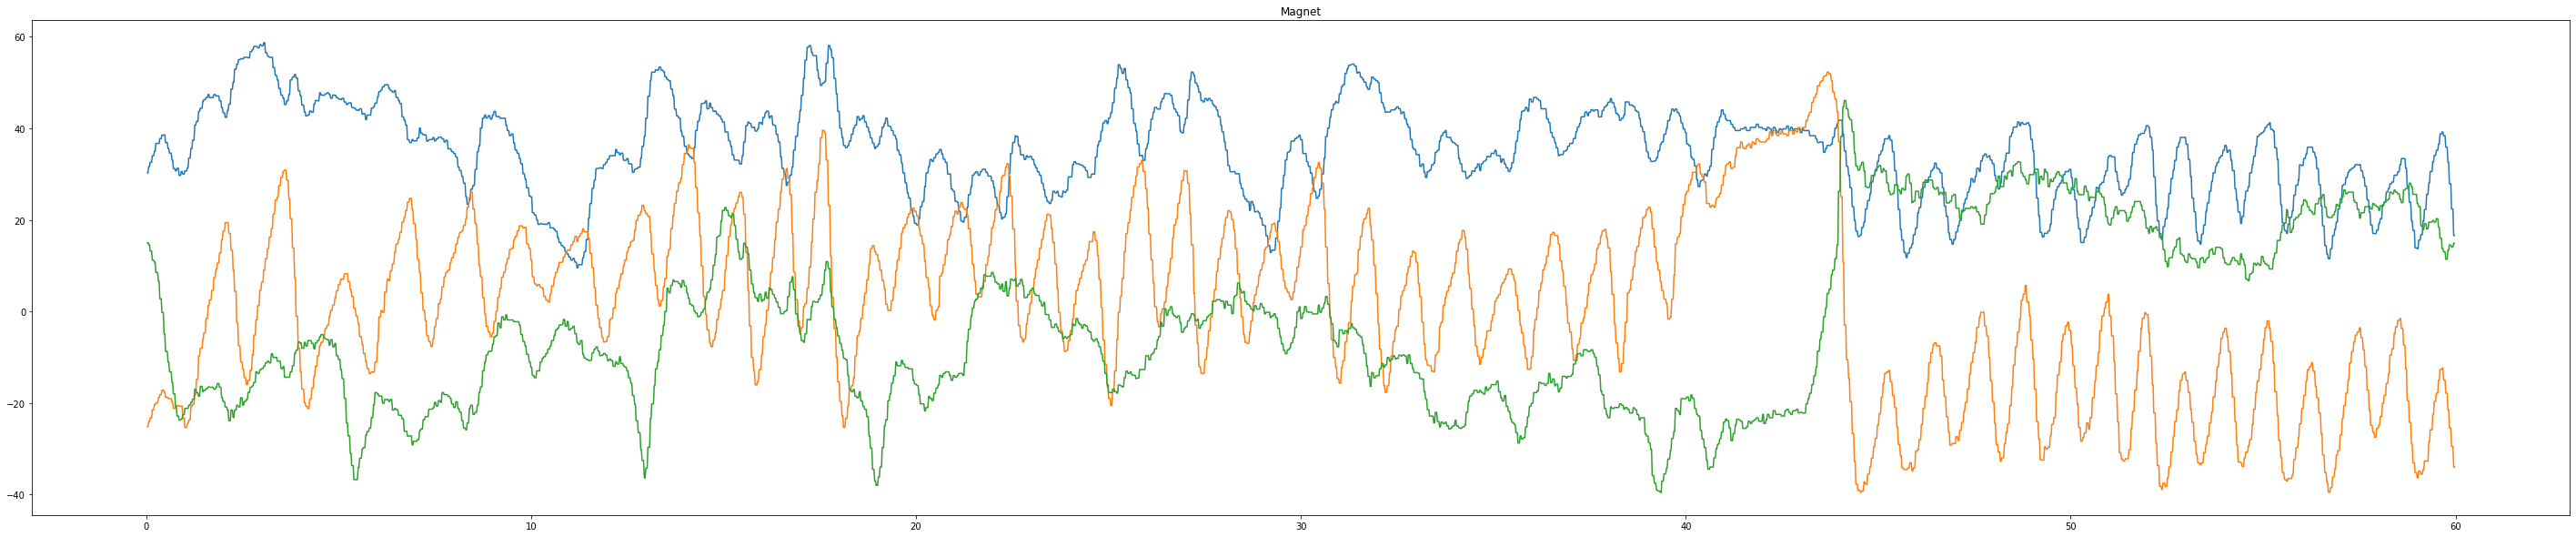

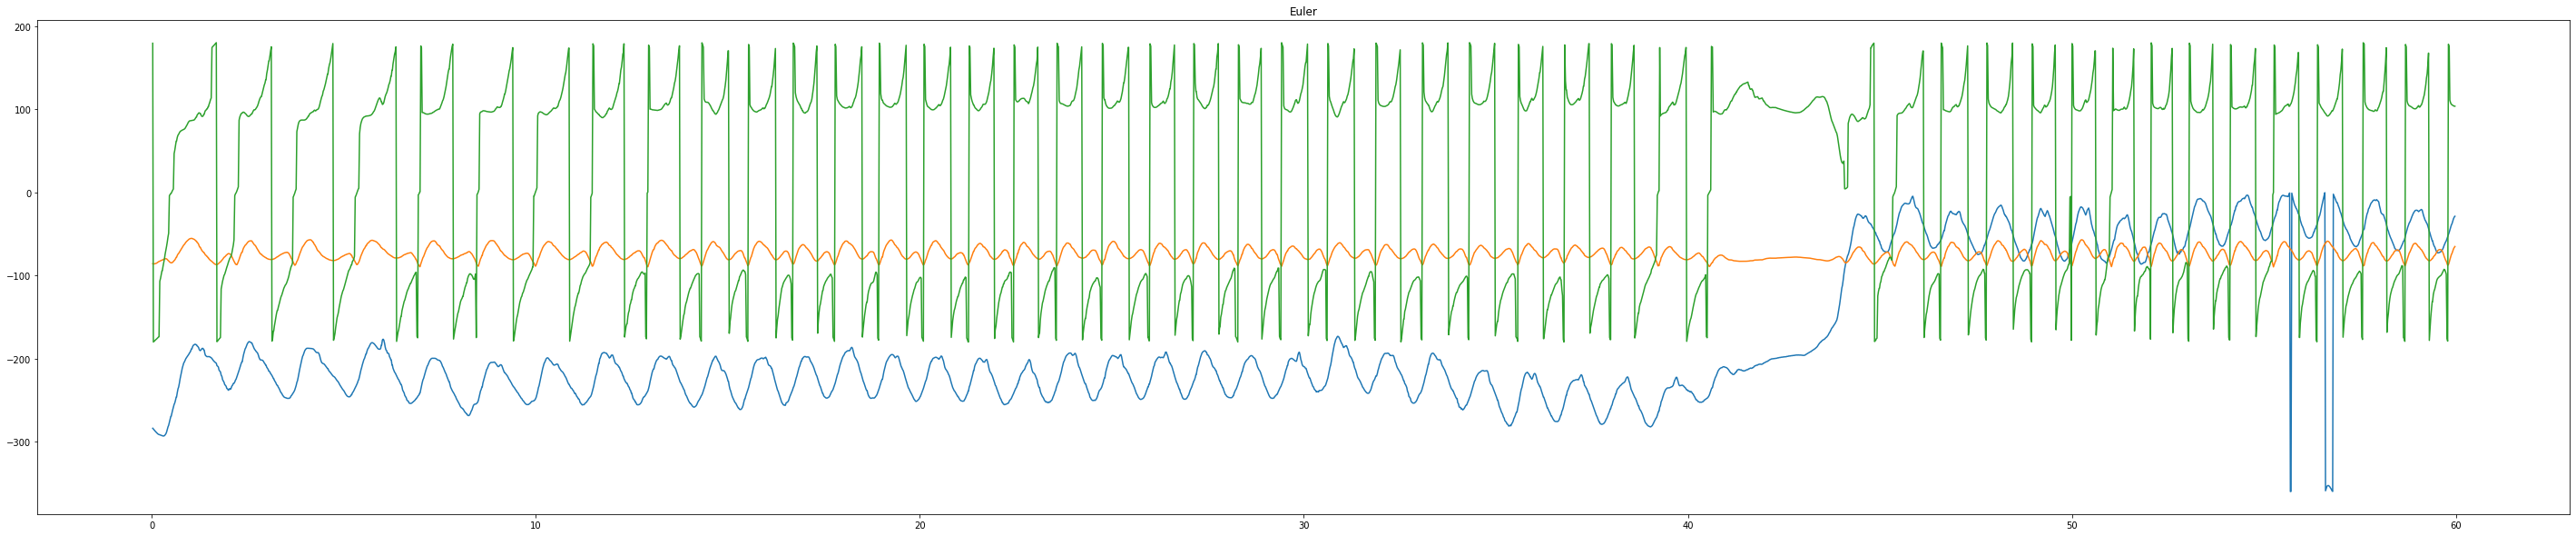

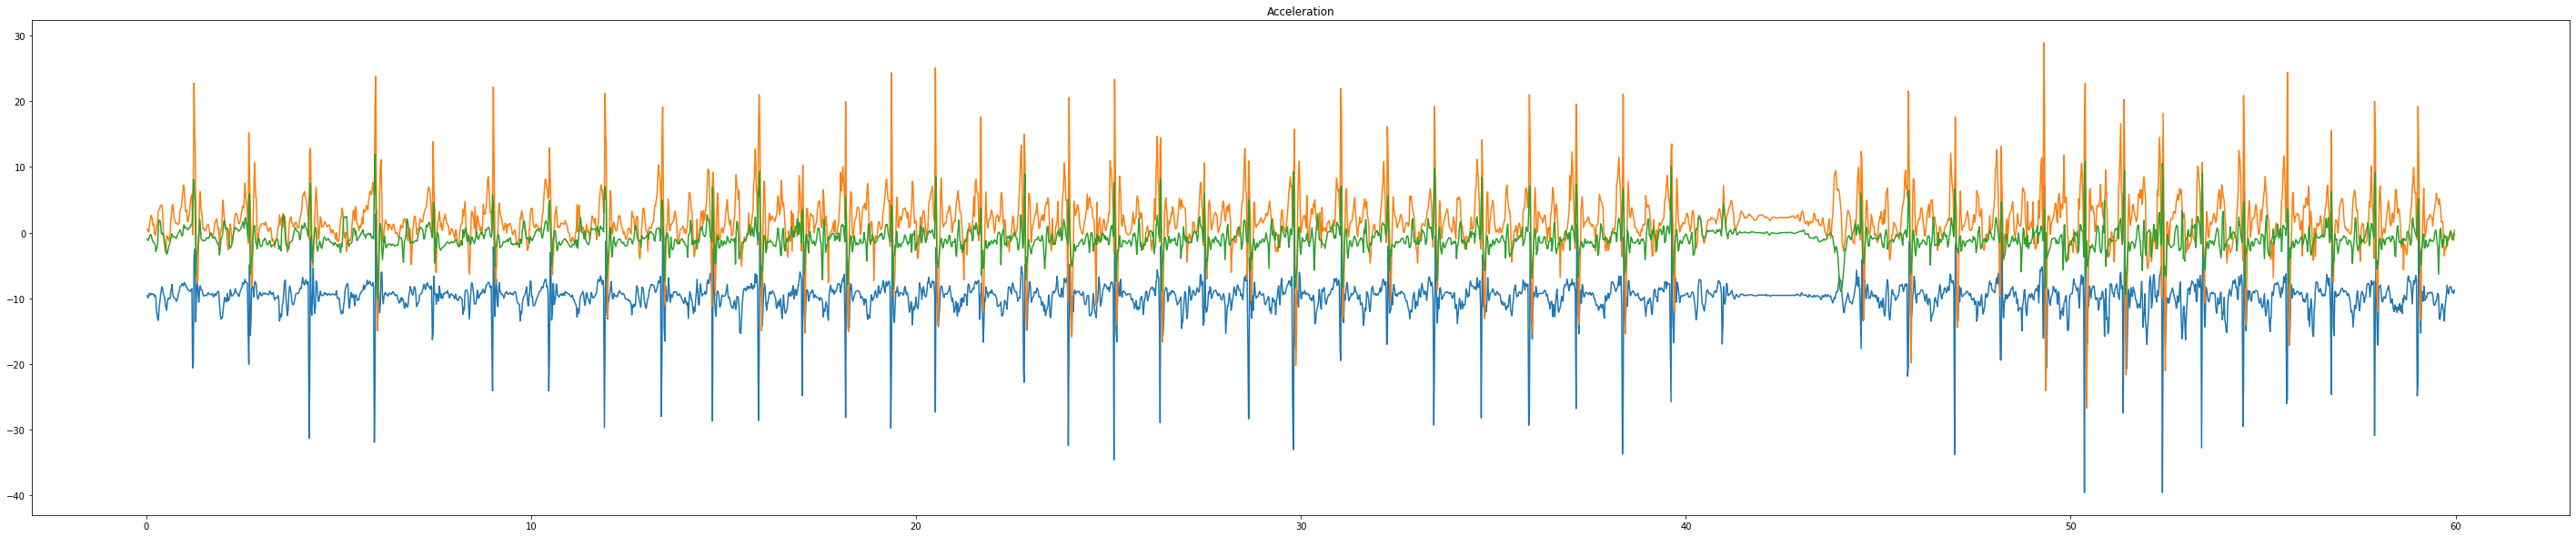

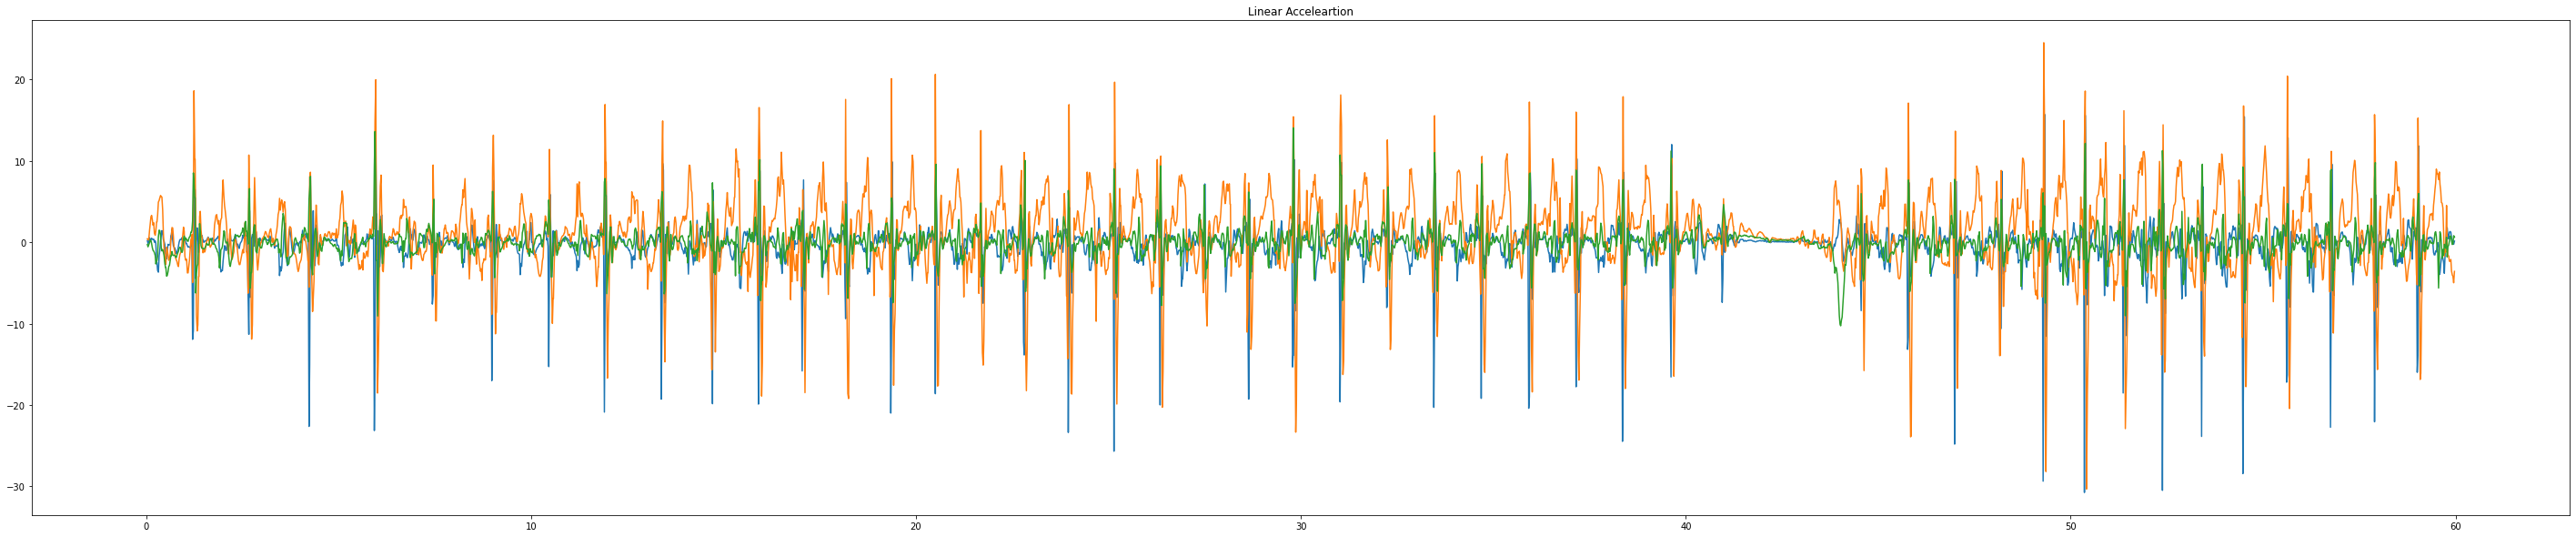

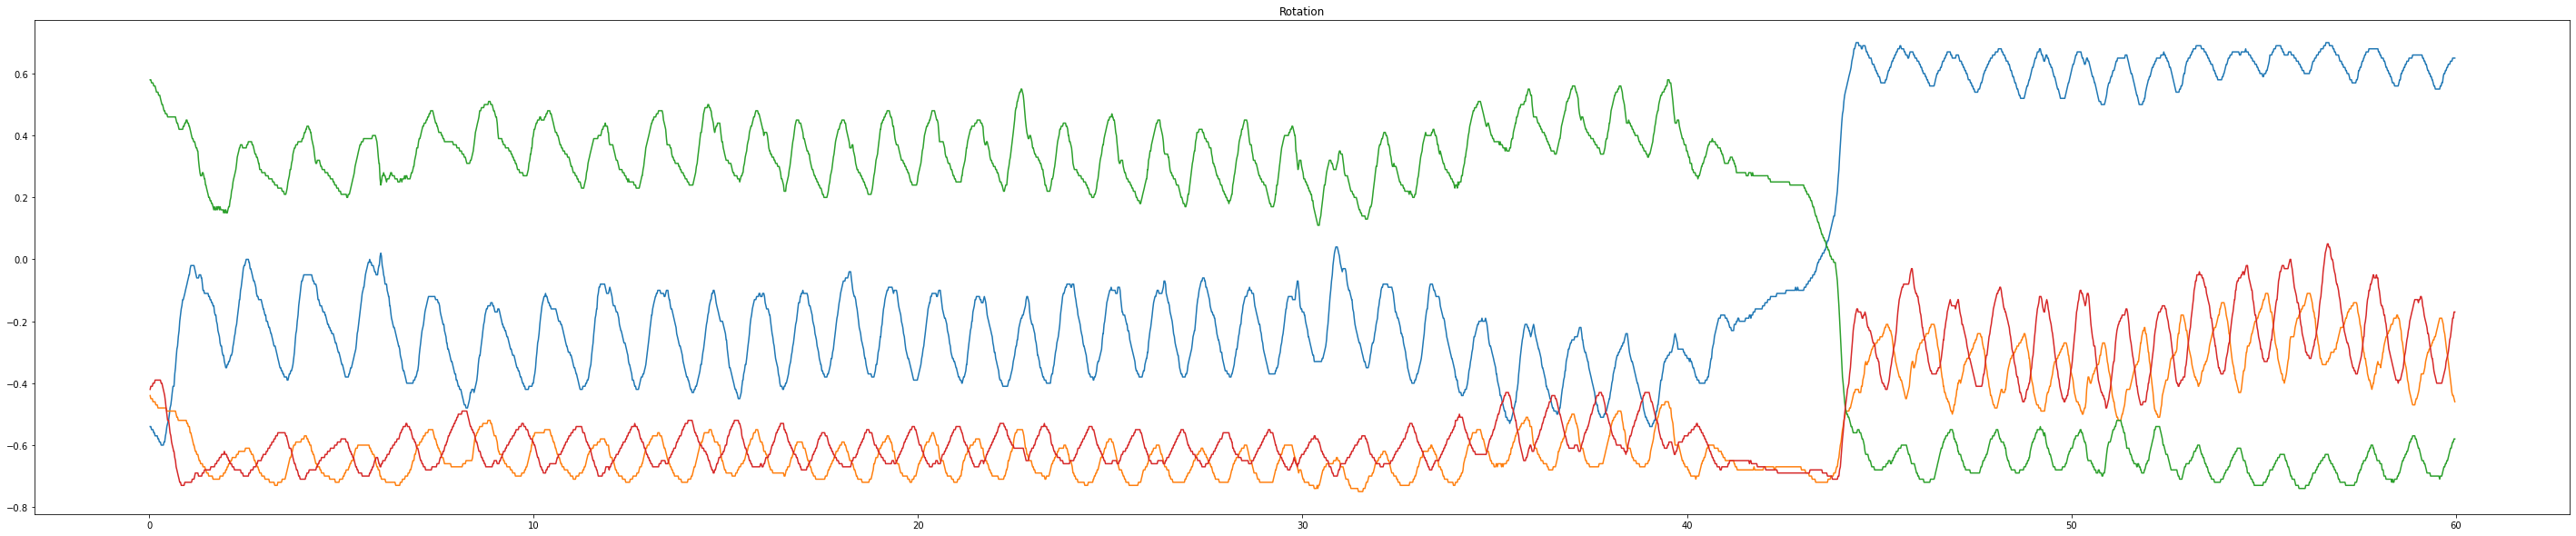

In [6]:
to_plot = -1
figsize = (50, 10)

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['Angle'][:to_plot])
plt.title('Desired Angle')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['grav1'][:to_plot])
plt.plot(time[:to_plot], df['grav2'][:to_plot])
plt.plot(time[:to_plot], df['grav3'][:to_plot])
plt.title('Gravity')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['gyro1'][:to_plot])
plt.plot(time[:to_plot], df['gyro2'][:to_plot])
plt.plot(time[:to_plot], df['gyro3'][:to_plot])
plt.title('Gyro')
plt.figure(figsize=figsize, facecolor=(1,1,1)) # magnet bad
plt.plot(time[:to_plot], df['magnet1'][:to_plot])
plt.plot(time[:to_plot], df['magnet2'][:to_plot])
plt.plot(time[:to_plot], df['magnet3'][:to_plot])
plt.title('Magnet')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['euler1'][:to_plot])
plt.plot(time[:to_plot], df['euler2'][:to_plot])
plt.plot(time[:to_plot], df['euler3'][:to_plot])
plt.title('Euler')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['accl1'][:to_plot])
plt.plot(time[:to_plot], df['accl2'][:to_plot])
plt.plot(time[:to_plot], df['accl3'][:to_plot])
plt.title('Acceleration')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['linaccl1'][:to_plot])
plt.plot(time[:to_plot], df['linaccl2'][:to_plot])
plt.plot(time[:to_plot], df['linaccl3'][:to_plot])
plt.title('Linear Acceleartion')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['quat1'][:to_plot])
plt.plot(time[:to_plot], df['quat2'][:to_plot])
plt.plot(time[:to_plot], df['quat3'][:to_plot])
plt.plot(time[:to_plot], df['quat4'][:to_plot])
plt.title('Rotation')


# Data Cleaning

In [7]:
feats_to_use = ['Angle','grav1','grav2','grav3','gyro1','gyro2','gyro3','euler1','euler2','euler3','accl1','accl2','accl3']
data_arr = np.array(df[feats_to_use])
y = data_arr[:,0]
X = data_arr[:,1:]
X = preprocessing.scale(X)


## Scaleograms

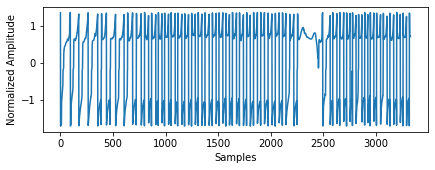

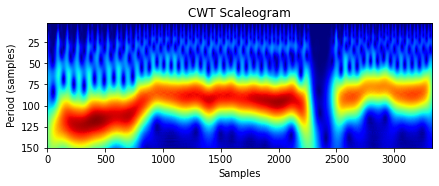

In [18]:
# Visualize using pywt

feat = 8

scales = np.arange(2, f*2)
coefs, freqs = pywt.cwt(X[:,feat], scales, 'cmor-1-1')
coefs = np.abs(coefs)
plt.figure(figsize=(6.9,2.3))
plt.plot(X[:,feat])
plt.xlabel('Samples')
plt.ylabel('Normalized Amplitude')

plt.figure(figsize=(6.9,2.3))
plt.imshow(coefs, extent=[0, time.size, 150, 2], cmap='jet', aspect='auto',
            vmax=coefs.max(), vmin=-coefs.min())
plt.title('CWT Scaleogram')
plt.xlabel('Samples')
plt.ylabel('Period (samples)')
plt.show() 

## Dimensionality Reduction

In [19]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

coefs_reduced = PCA(n_components=10).fit_transform(coefs[:40,:].T)
coefs_embedded = TSNE(n_components=2, perplexity=62, verbose=True).fit_transform(coefs_reduced)



[t-SNE] Computing 187 nearest neighbors...
[t-SNE] Indexed 3330 samples in 0.005s...
[t-SNE] Computed neighbors for 3330 samples in 0.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3330
[t-SNE] Computed conditional probabilities for sample 2000 / 3330
[t-SNE] Computed conditional probabilities for sample 3000 / 3330
[t-SNE] Computed conditional probabilities for sample 3330 / 3330
[t-SNE] Mean sigma: 0.354866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.855354
[t-SNE] KL divergence after 1000 iterations: 0.830541


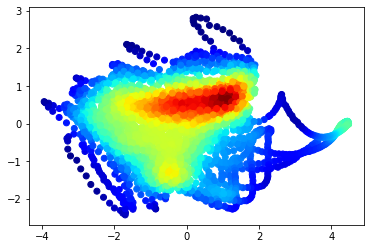

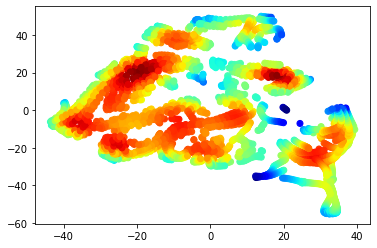

In [20]:

xy = np.vstack([coefs_reduced[:,0], coefs_reduced[:,1]])
z = gaussian_kde(xy)(xy)
plt.figure()
plt.scatter(coefs_reduced[:,0], coefs_reduced[:,1], c=z, cmap='jet')

xy = np.vstack([coefs_embedded[:,0], coefs_embedded[:,1]])
z = gaussian_kde(xy)(xy)
plt.figure()
plt.scatter(coefs_embedded[:,0], coefs_embedded[:,1], c=z, cmap='jet')


## Identifying gait phase using KMeans

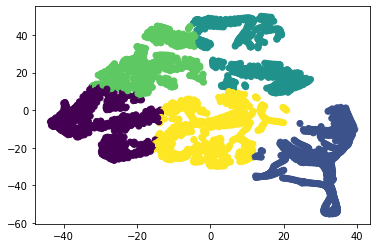

In [26]:
# Kmeans
from sklearn.cluster import KMeans

n_clusters = 5

coefs_pred = KMeans(n_clusters=n_clusters).fit_predict(coefs_embedded)
plt.scatter(coefs_embedded[:,0], coefs_embedded[:,1], c=coefs_pred)

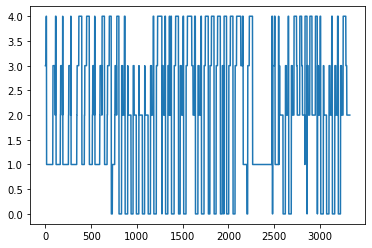

In [27]:
plt.plot(coefs_pred[:to_plot])

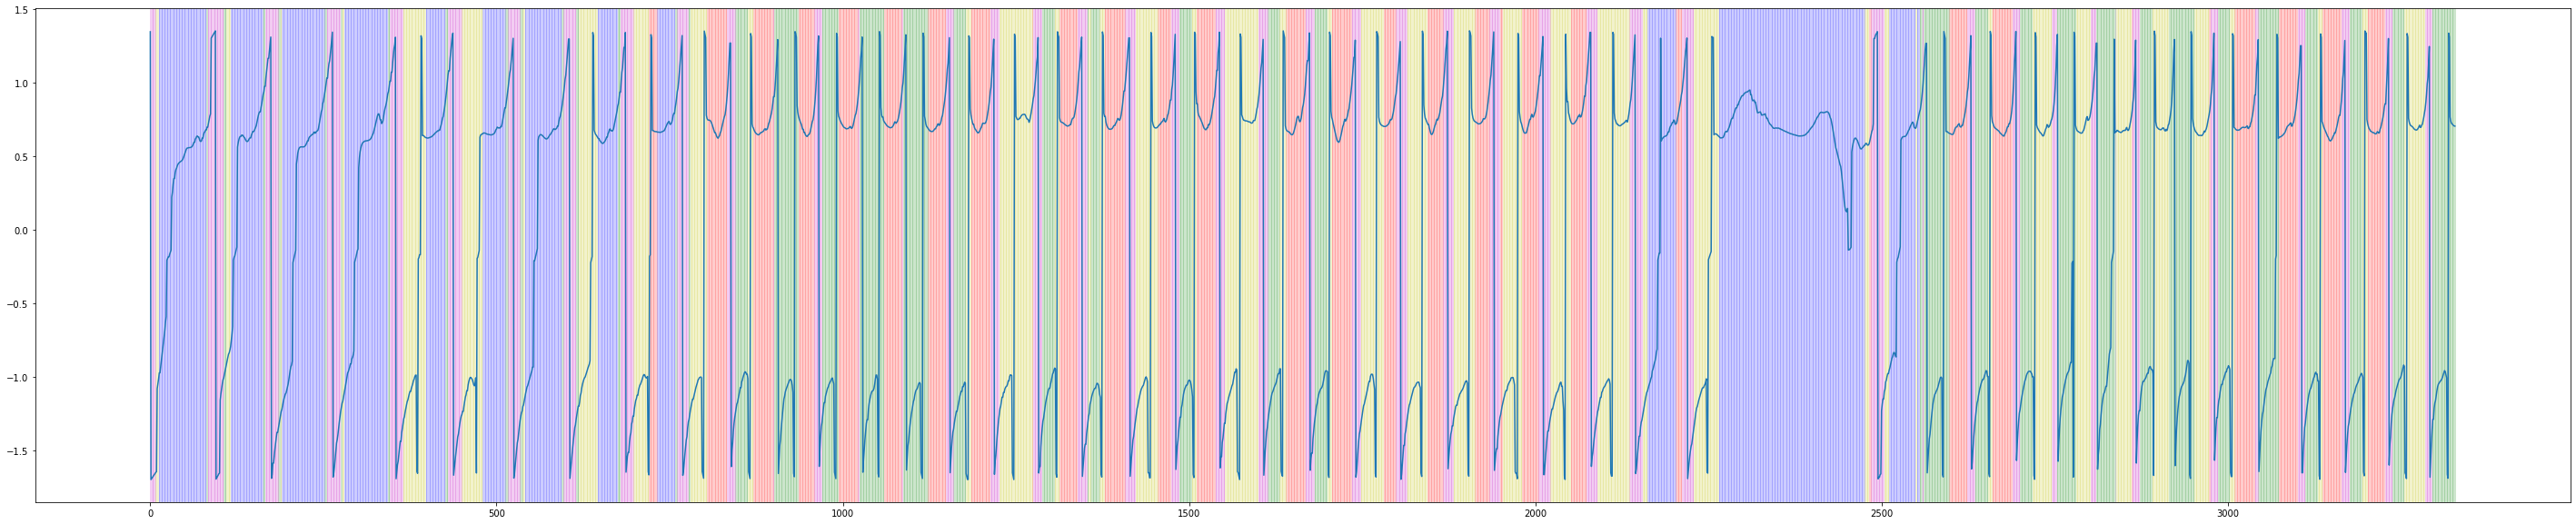

In [28]:
to_plot = -1


colors = ['r','b','g','m','y','k','r']
plt.figure(figsize=(50,10))
plt.plot(X[:,8][:to_plot])
for k in range(n_clusters):
    for i in range(np.where(coefs_pred[:to_plot]==k)[0].size):
        plt.axvspan(np.where(coefs_pred==k)[0][i], np.where(coefs_pred==k)[0][i], color=colors[k], alpha=0.2)


# Code snippets, no longer used

In [263]:
# csv formatting
'''
data_dir = ".\ml_data_v2\csv"
data = []

for f in os.listdir(data_dir):
    if f[0] is not '.':
        df = pd.read_csv(os.path.join(data_dir, f))
        df.columns=['remove0','time','dt','remove1','remove2','Angle','remove3',
                     'grav1','grav2','grav3','remove4','gyro1','gyro2','gyro3',
                     'remove5','magnet1','magnet2','magnet3','remove6',
                     'euler1','euler2','euler3','remove7','accl1','accl2','accl3',
                     'remove8','linaccl1','linaccl2','linaccl3','remove8','quat1',
                     'quat2','quat3','quat4']
        df = df[df.columns.drop(list(df.filter(regex='remove.*')))]
        data.append(df)
        df.to_csv(os.path.join(data_dir,'tmp', f))

data[0].head()'''

'\ndata_dir = ".\\ml_data_v2\\csv"\ndata = []\n\nfor f in os.listdir(data_dir):\n    if f[0] is not \'.\':\n        df = pd.read_csv(os.path.join(data_dir, f))\n        df.columns=[\'remove0\',\'time\',\'dt\',\'remove1\',\'remove2\',\'Angle\',\'remove3\',\n                     \'grav1\',\'grav2\',\'grav3\',\'remove4\',\'gyro1\',\'gyro2\',\'gyro3\',\n                     \'remove5\',\'magnet1\',\'magnet2\',\'magnet3\',\'remove6\',\n                     \'euler1\',\'euler2\',\'euler3\',\'remove7\',\'accl1\',\'accl2\',\'accl3\',\n                     \'remove8\',\'linaccl1\',\'linaccl2\',\'linaccl3\',\'remove8\',\'quat1\',\n                     \'quat2\',\'quat3\',\'quat4\']\n        df = df[df.columns.drop(list(df.filter(regex=\'remove.*\')))]\n        data.append(df)\n        df.to_csv(os.path.join(data_dir,\'tmp\', f))\n\ndata[0].head()'

Default wavelet function used to compute the transform: cmor1-1.5 ( Complex Morlet wavelets )


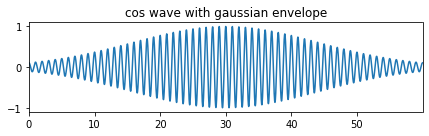

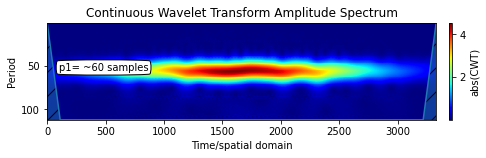

In [142]:
# Kaggle wavelet tutorial

# a range of scales to perform the transform
# 1 period = f samples

scg.set_default_wavelet('cmor1-1')
scales = scg.periods2scales( np.arange(1, f*2) )

# and a periodic signal with varying amplitude
p1=1; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/(2*f))/20)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(time, periodic1); 
ax1.set_xlim(0, max(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1= ~60 samples", xy=(100, f), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

Default wavelet function used to compute the transform: cmor1-1 ( Complex Morlet wavelets )


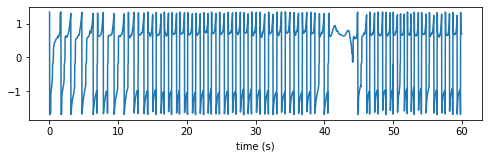

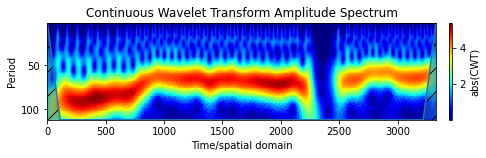

In [220]:
# Kaggle wavelet tutorial

# Visualize using scaleograms package

# a range of scales to perform the transform
# measure period using sameples
# eg. period of 60 samples for signal sampled at 60Hz corresponds to time period of 1s
scg.set_default_wavelet('cmor1-1')

scales = scg.periods2scales( np.arange(2, f*2) )
to_plot = -1

# and a periodic signal with varying amplitude
#p1=1; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/(2*f))/20)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.9,2.3));  
lines = ax1.plot(time[:to_plot], X[:,8][:to_plot]); 
#ax1.set_xlim(0, max(time))
ax1.set_title("")
ax1.set_xlabel("time (s)")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(X[:,8][:to_plot], scales=scales, figsize=(6.9,2.3));
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")